![pandas](https://i.redd.it/c6h7rok9c2v31.jpg)
*By Shreeyansh Das, Source: gfg, Pandas Documentation*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

---
---
# 1. Manipulating Dataset
---
---
Data Manipulation generally consists of adding rows/columns, deleting them, changing column names or their positions.

## 1.1 Insertion Operations

### 1.1.1 Inserting Column

`DataFrame.insert(location, columnName, values, allow_duplicates = False)` - Insert a column at specified Location. Raises a ValueError if column is already contained in the DataFrame, unless allow_duplicates is set to True.

* **Insert at any place** 

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.insert(len(df.columns), "New Column", np.random.normal(size = (len(df),1) ) ) 

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,New Column
0,5.1,3.5,1.4,0.2,setosa,-1.309737
1,4.9,3.0,1.4,0.2,setosa,0.807481
2,4.7,3.2,1.3,0.2,setosa,-0.537893
3,4.6,3.1,1.5,0.2,setosa,-1.517388
4,5.0,3.6,1.4,0.2,setosa,-0.190272


* **Insert at end**

In [5]:
df['New Column 2'] = np.random.normal(size= (len(df),1) )

In [6]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,5.1,3.5,1.4,0.2,setosa,-1.309737,0.931180
1,4.9,3.0,1.4,0.2,setosa,0.807481,0.053178
2,4.7,3.2,1.3,0.2,setosa,-0.537893,1.233451


### 1.1.2 Inserting Rows

* **Inserting at BOTTOM**

`DataFrame.append(other, ignore_index=False)` - Append rows of *other* to the end of caller, returning a new object. Columns in *other* that are not in the caller are added as new columns. *other* can be a dictionary with key value pairs, **values being passed as a list**. Returns a copy of the DataFrame. Original dataframe remains unchanged.

In [7]:
new_entry = pd.DataFrame({"sepal_length":[4.3], "sepal_width":[3.6], "petal_length":[1.4], "petal_width":[0.2], 
                          "species":["virginica"], "New Column":[np.random.rand()], "New Column 2":[np.random.rand()]})
new_entry

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,4.3,3.6,1.4,0.2,virginica,0.94447,0.495838


In [8]:
df.append(new_entry, ignore_index = True).tail()

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
146,6.3,2.5,5.0,1.9,virginica,-0.495434,-1.511856
147,6.5,3.0,5.2,2.0,virginica,1.709576,-0.819625
148,6.2,3.4,5.4,2.3,virginica,0.608338,-0.104263
149,5.9,3.0,5.1,1.8,virginica,1.714099,0.267996
150,4.3,3.6,1.4,0.2,virginica,0.944470,0.495838


* **Inserting at TOP**

The `pd.concat([df, new_entry])` helps to insert a new row at the top of the dataframe. The `reset_index()` index method resets index of DataFrame to row numbers.

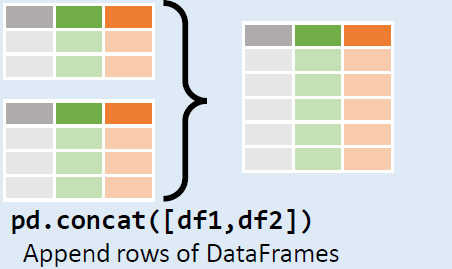

The `DataFrame.reset_index()` resets the index of the DataFrame, and uses the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels. When we reset the index, the old index is added as a column, and a new sequential index is used. We can use the `drop` parameter to avoid the old index being added as a column.

In [9]:
pd.concat([new_entry, df]).reset_index().head(4) #new entry inserted at top

,index,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,0,4.3,3.6,1.4,0.2,virginica,0.944470,0.495838
1,0,5.1,3.5,1.4,0.2,setosa,-1.309737,0.931180
2,1,4.9,3.0,1.4,0.2,setosa,0.807481,0.053178
3,2,4.7,3.2,1.3,0.2,setosa,-0.537893,1.233451


In [10]:
pd.concat([new_entry, df]).reset_index(drop = True).head(4) #remove the index column

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,4.3,3.6,1.4,0.2,virginica,0.944470,0.495838
1,5.1,3.5,1.4,0.2,setosa,-1.309737,0.931180
2,4.9,3.0,1.4,0.2,setosa,0.807481,0.053178
3,4.7,3.2,1.3,0.2,setosa,-0.537893,1.233451


* **Insert at any place**

To insert at any place, simply concatenate and then use `DataFrame.sort_index(axis)`

In [11]:
entry = pd.DataFrame({"sepal_length":[4.3], "sepal_width":[3.6], "petal_length":[1.4], "petal_width":[0.2], 
                     "species":["virginica"], "New Column":[np.random.rand()], "New Column 2":[np.random.rand()]}, index = [4])
entry

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
4,4.3,3.6,1.4,0.2,virginica,0.641978,0.297237


In [12]:
df = pd.concat([df,entry])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
146,6.3,2.5,5.0,1.9,virginica,-0.495434,-1.511856
147,6.5,3.0,5.2,2.0,virginica,1.709576,-0.819625
148,6.2,3.4,5.4,2.3,virginica,0.608338,-0.104263
149,5.9,3.0,5.1,1.8,virginica,1.714099,0.267996
4,4.3,3.6,1.4,0.2,virginica,0.641978,0.297237


In [13]:
df.sort_index(axis=0, inplace = True)

In [14]:
df.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,5.1,3.5,1.4,0.2,setosa,-1.309737,0.931180
1,4.9,3.0,1.4,0.2,setosa,0.807481,0.053178
2,4.7,3.2,1.3,0.2,setosa,-0.537893,1.233451
3,4.6,3.1,1.5,0.2,setosa,-1.517388,0.244468
4,4.3,3.6,1.4,0.2,virginica,0.641978,0.297237
4,5.0,3.6,1.4,0.2,setosa,-0.190272,-0.766976
5,5.4,3.9,1.7,0.4,setosa,-0.525090,-2.357561


In [15]:
df.reset_index(inplace = True, drop = True)

In [16]:
df.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,5.1,3.5,1.4,0.2,setosa,-1.309737,0.931180
1,4.9,3.0,1.4,0.2,setosa,0.807481,0.053178
2,4.7,3.2,1.3,0.2,setosa,-0.537893,1.233451
3,4.6,3.1,1.5,0.2,setosa,-1.517388,0.244468
4,4.3,3.6,1.4,0.2,virginica,0.641978,0.297237
5,5.0,3.6,1.4,0.2,setosa,-0.190272,-0.766976
6,5.4,3.9,1.7,0.4,setosa,-0.525090,-2.357561


**Note that `sort_index` sorts the dataset into ascending order as per index values while `reset_index` overwrites the indices as per their current position in the dataset**

---
## 1.2 Deletion Operations

**Deleting Columns/rows**
 
 Rows or columns can be removed using index label or column name using `DataFrame.drop()` method.

In [17]:
df.drop([3]).head()  #Deleting row by specifying index. Use df.reset_index then to reset the indices.

,sepal_length,sepal_width,petal_length,petal_width,species,New Column,New Column 2
0,5.1,3.5,1.4,0.2,setosa,-1.309737,0.931180
1,4.9,3.0,1.4,0.2,setosa,0.807481,0.053178
2,4.7,3.2,1.3,0.2,setosa,-0.537893,1.233451
4,4.3,3.6,1.4,0.2,virginica,0.641978,0.297237
5,5.0,3.6,1.4,0.2,setosa,-0.190272,-0.766976


In [18]:
df.drop(['New Column 2'], axis = 1).head() #Deleting row by specifying column name, along with axis

,sepal_length,sepal_width,petal_length,petal_width,species,New Column
0,5.1,3.5,1.4,0.2,setosa,-1.309737
1,4.9,3.0,1.4,0.2,setosa,0.807481
2,4.7,3.2,1.3,0.2,setosa,-0.537893
3,4.6,3.1,1.5,0.2,setosa,-1.517388
4,4.3,3.6,1.4,0.2,virginica,0.641978


The `df.pop(col_name)` method drops the column name passed as an argument **in the original DataFrame**.

In [19]:
df.pop('New Column')

0     -1.309737
1      0.807481
2     -0.537893
3     -1.517388
4      0.641978
         ...   
146   -1.946547
147   -0.495434
148    1.709576
149    0.608338
150    1.714099
Name: New Column, Length: 151, dtype: float64

---
## 1.3 Renaming Operations

### 1.3.1 Renaming Columns/Rows

**Method 1** : Use `DataFrame.rename(columns/index, inplace)`

One way of renaming the columns or rows' indices in a Pandas dataframe is by using the rename() function. This method is quite useful when we need to rename some selected columns because we need to specify information only for the columns which are to be renamed.

In [20]:
df.rename(columns = {'New Column 2':'New Feature', 'species':'SPECIES'}, inplace = True)

In [21]:
list(df)

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'SPECIES',
 'New Feature']

**Method 2** : Assign a new list of column names

The columns can also be renamed by directly assigning a list containing the new names to the columns attribute of the dataframe object for which we want to rename the columns. The **disadvantage with this method is that we need to provide new names for all the columns even if want to rename only some of the columns.**

In [22]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'SPECIES', 'New Feature']

In [23]:
list(df)

['sepal length',
 'sepal width',
 'petal length',
 'petal width',
 'SPECIES',
 'New Feature']

### 1.3.2 Renaming Rows (Swapping Rows)

In [24]:
df_iso = df.head(5)

In [25]:
df_iso

,sepal length,sepal width,petal length,petal width,SPECIES,New Feature
0,5.1,3.5,1.4,0.2,setosa,0.931180
1,4.9,3.0,1.4,0.2,setosa,0.053178
2,4.7,3.2,1.3,0.2,setosa,1.233451
3,4.6,3.1,1.5,0.2,setosa,0.244468
4,4.3,3.6,1.4,0.2,virginica,0.297237


Keep `inplace = False` to avoid *Chained Indexing* errors

In [26]:
df_iso = df_iso.rename(index = {1:4, 4:1}, inplace = False)  # Record 1 and Record 4 'index' changed
df_iso

,sepal length,sepal width,petal length,petal width,SPECIES,New Feature
0,5.1,3.5,1.4,0.2,setosa,0.931180
4,4.9,3.0,1.4,0.2,setosa,0.053178
2,4.7,3.2,1.3,0.2,setosa,1.233451
3,4.6,3.1,1.5,0.2,setosa,0.244468
1,4.3,3.6,1.4,0.2,virginica,0.297237


In [27]:
df_iso.sort_index() # Sorting indices

,sepal length,sepal width,petal length,petal width,SPECIES,New Feature
0,5.1,3.5,1.4,0.2,setosa,0.931180
1,4.3,3.6,1.4,0.2,virginica,0.297237
2,4.7,3.2,1.3,0.2,setosa,1.233451
3,4.6,3.1,1.5,0.2,setosa,0.244468
4,4.9,3.0,1.4,0.2,setosa,0.053178



### 1.3.3 Changing Column Names' Case

In [28]:
df.columns.str.upper()

Index(['SEPAL LENGTH', 'SEPAL WIDTH', 'PETAL LENGTH', 'PETAL WIDTH', 'SPECIES',
       'NEW FEATURE'],
      dtype='object')

In [29]:
df.columns.str.lower()

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'species',
       'new feature'],
      dtype='object')

In [30]:
df.columns.str.capitalize()

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species',
       'New feature'],
      dtype='object')

## 1.4 Interchanging Operations 

### 1.4.1 Interchanging Columns

In [31]:
df.head(3)

,sepal length,sepal width,petal length,petal width,SPECIES,New Feature
0,5.1,3.5,1.4,0.2,setosa,0.931180
1,4.9,3.0,1.4,0.2,setosa,0.053178
2,4.7,3.2,1.3,0.2,setosa,1.233451


In [32]:
df = df.loc[:, ['sepal length','petal length', 'sepal width', 'petal width', 'SPECIES', 'New Feature']]

In [33]:
df.head()

,sepal length,petal length,sepal width,petal width,SPECIES,New Feature
0,5.1,1.4,3.5,0.2,setosa,0.931180
1,4.9,1.4,3.0,0.2,setosa,0.053178
2,4.7,1.3,3.2,0.2,setosa,1.233451
3,4.6,1.5,3.1,0.2,setosa,0.244468
4,4.3,1.4,3.6,0.2,virginica,0.297237



### 1.4.2 Interchanging Rows

Refer to section **1.3.2**

---
## 1.5 Truncating Operations
Pandas `DataFrame.truncate()` function is used to truncate a Series or DataFrame before and after some index value. This is a useful shorthand for boolean indexing based on index values above or below certain thresholds.
<br>`before` : Truncate all rows **before this index value**.
<br>`after` : Truncate all rows **after this index value**.
<br>`axis` : Axis to truncate. Truncates the index (rows) by default.

In [34]:
df.truncate(before = 12 , after = 16)

,sepal length,petal length,sepal width,petal width,SPECIES,New Feature
12,4.8,1.6,3.4,0.2,setosa,-0.462617
13,4.8,1.4,3.0,0.1,setosa,-0.762512
14,4.3,1.1,3.0,0.1,setosa,0.065553
15,5.8,1.2,4.0,0.2,setosa,2.083653
16,5.7,1.5,4.4,0.4,setosa,-1.444299


In [35]:
df['sepal length'].truncate(before = 12 , after = 16)

12    4.8
13    4.8
14    4.3
15    5.8
16    5.7
Name: sepal length, dtype: float64

---
## 1.6 Iterating over Rows and Columns
Pandas DataFrame consists of rows and columns so, in order to iterate over dataframe, we have to iterate a dataframe like a dictionary. In a dictionary, we iterate over the keys of the object in the same way we have to iterate in dataframe. In Pandas Dataframe we can iterate an element in two ways: 

* Iterating over rows
* Iterating over columns 

### 1.6.1 Iterating over Rows
In order to iterate over rows, we can use three function `iteritems()`, `iterrows()`, `itertuples()`. These three function will help in iteration over rows.  

In [36]:
k = 0
for i,j in df.iterrows():
    while k<3:
        print(i,j)
        print("\n")
        k = k+1

0 sepal length        5.1
petal length        1.4
sepal width         3.5
petal width         0.2
SPECIES          setosa
New Feature     0.93118
Name: 0, dtype: object


0 sepal length        5.1
petal length        1.4
sepal width         3.5
petal width         0.2
SPECIES          setosa
New Feature     0.93118
Name: 0, dtype: object


0 sepal length        5.1
petal length        1.4
sepal width         3.5
petal width         0.2
SPECIES          setosa
New Feature     0.93118
Name: 0, dtype: object




In [37]:
for key,value in df.iteritems():
        print(key,value)
        print("\n")

sepal length 0      5.1
1      4.9
2      4.7
3      4.6
4      4.3
      ... 
146    6.7
147    6.3
148    6.5
149    6.2
150    5.9
Name: sepal length, Length: 151, dtype: float64


petal length 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
146    5.2
147    5.0
148    5.2
149    5.4
150    5.1
Name: petal length, Length: 151, dtype: float64


sepal width 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
146    3.0
147    2.5
148    3.0
149    3.4
150    3.0
Name: sepal width, Length: 151, dtype: float64


petal width 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal width, Length: 151, dtype: float64


SPECIES 0         setosa
1         setosa
2         setosa
3         setosa
4      virginica
         ...    
146    virginica
147    virginica
148    virginica
149    virginica
150    virginica
Name: SPECIES, Length: 151, dtype: object


New Feature 0      0.931180
1

In [38]:
for i in df.head().itertuples():
    print(i)
    print()

Pandas(Index=0, _1=5.1, _2=1.4, _3=3.5, _4=0.2, SPECIES='setosa', _6=0.9311795518081465)

Pandas(Index=1, _1=4.9, _2=1.4, _3=3.0, _4=0.2, SPECIES='setosa', _6=0.0531776385150014)

Pandas(Index=2, _1=4.7, _2=1.3, _3=3.2, _4=0.2, SPECIES='setosa', _6=1.2334510457821326)

Pandas(Index=3, _1=4.6, _2=1.5, _3=3.1, _4=0.2, SPECIES='setosa', _6=0.24446798924864063)

Pandas(Index=4, _1=4.3, _2=1.4, _3=3.6, _4=0.2, SPECIES='virginica', _6=0.29723682764870996)



### 1.6.1 Iterating over Columns
In order to iterate over columns, we need to create a list of DataFrame columns and then iterate through that list to pull out the dataframe columns.

In [39]:
columns = list(df)

In [40]:
for i in columns:
    print(df[i][2])

4.7
1.3
3.2
0.2
setosa
1.2334510457821326


---
## 1.7 Sorting DataSet
Pandas `sort_values()` function sorts a data frame in Ascending or Descending order of passed Column. It’s different than the sorted Python function since it cannot sort a data frame and particular column cannot be selected. Pass the `na_position` argument to set the position of NaNs.

In [41]:
df.head().sort_values('sepal length', axis = 0, ascending = True)

,sepal length,petal length,sepal width,petal width,SPECIES,New Feature
4,4.3,1.4,3.6,0.2,virginica,0.297237
3,4.6,1.5,3.1,0.2,setosa,0.244468
2,4.7,1.3,3.2,0.2,setosa,1.233451
1,4.9,1.4,3.0,0.2,setosa,0.053178
0,5.1,1.4,3.5,0.2,setosa,0.931180


As shown above, index column is now jumbled since the data frame is sorted by sepal length.

In [42]:
df.head().sort_values(['sepal length','petal length'], axis = 0, ascending = True)

,sepal length,petal length,sepal width,petal width,SPECIES,New Feature
4,4.3,1.4,3.6,0.2,virginica,0.297237
3,4.6,1.5,3.1,0.2,setosa,0.244468
2,4.7,1.3,3.2,0.2,setosa,1.233451
1,4.9,1.4,3.0,0.2,setosa,0.053178
0,5.1,1.4,3.5,0.2,setosa,0.931180


---
## 1.8 Miscellaneous Operations

* **Set a column as index**

*Method 1* : Use `DataFrame.set_index(column)`

In [43]:
data = {'Name':["Akash", "Geeku", "Pankaj", "Sumitra","Ramlal"],
       'Branch':["B.Tech", "MBA", "BCA", "B.Tech", "BCA"],
       'Score':["80","90","60", "30", "50"],
       'Result': ["Pass","Pass","Pass","Fail","Fail"]}
df_mis = pd.DataFrame(data)

In [44]:
df_mis = df_mis.set_index('Name').head()

In [45]:
df_mis.index.names = [None]

In [46]:
df_mis

,Branch,Score,Result
Akash,B.Tech,80,Pass
Geeku,MBA,90,Pass
Pankaj,BCA,60,Pass
Sumitra,B.Tech,30,Fail
Ramlal,BCA,50,Fail


*Method 2* : Use `DataFrame.pivot(index, columns)`

In order to convert a column to row name/index in dataframe, Pandas has a built-in function Pivot.
Now, let’s say we want Result to be the rows/index, and columns be name in our dataframe, to achieve this pandas has provided a method called Pivot.

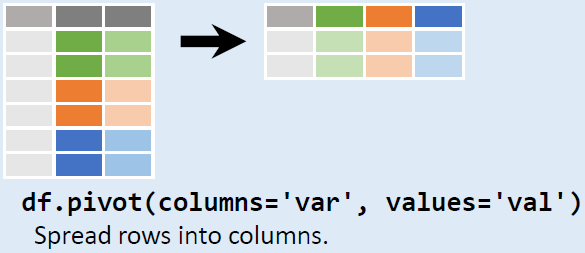

In [47]:
data = {'Name':["Akash", "Geeku", "Pankaj", "Sumitra","Ramlal"],
       'Branch':["B.Tech", "MBA", "BCA", "B.Tech", "BCA"],
       'Score':["80","90","60", "30", "50"],
       'Result': ["Pass","Pass","Pass","Fail","Fail"]}
df_mis = pd.DataFrame(data)

In [48]:
df_mis.pivot(index ='Result', columns ='Name')

Branch                             Score                            
Name     Akash Geeku Pankaj Ramlal Sumitra Akash Geeku Pankaj Ramlal Sumitra
Result                                                                      
Fail       NaN   NaN    NaN    BCA  B.Tech   NaN   NaN    NaN     50      30
Pass    B.Tech   MBA    BCA    NaN     NaN    80    90     60    NaN     NaN

---
* **Get n-Largest/Smallest values from a Column**

In [49]:
df.nlargest(5, ['sepal length'])

,sepal length,petal length,sepal width,petal width,SPECIES,New Feature
132,7.9,6.4,3.8,2.0,virginica,0.007566
118,7.7,6.7,3.8,2.2,virginica,-0.100209
119,7.7,6.9,2.6,2.3,virginica,1.299605
123,7.7,6.7,2.8,2.0,virginica,0.040535
136,7.7,6.1,3.0,2.3,virginica,-0.117319


In [50]:
df.nsmallest(5, ['sepal length'])

,sepal length,petal length,sepal width,petal width,SPECIES,New Feature
4,4.3,1.4,3.6,0.2,virginica,0.297237
14,4.3,1.1,3.0,0.1,setosa,0.065553
9,4.4,1.4,2.9,0.2,setosa,0.132723
39,4.4,1.3,3.0,0.2,setosa,0.309329
43,4.4,1.3,3.2,0.2,setosa,-0.371788


---
* **Getting Row Names**

While analyzing the real datasets which are often very huge in size, we might need to get the rows or index names in order to perform some certain operations.

**Method 1** : Iterate over indices

In [51]:
for row in df.head().index:
    print(row, end = " ")

0 1 2 3 4 

**Method 2** : Use `list(DataFrame.index)`

In [52]:
list(df.head().index)

[0, 1, 2, 3, 4]

**Method 3** : Use `DataFrame.values`

In [53]:
df.head().values

array([[5.1, 1.4, 3.5, 0.2, 'setosa', 0.9311795518081465],
       [4.9, 1.4, 3.0, 0.2, 'setosa', 0.0531776385150014],
       [4.7, 1.3, 3.2, 0.2, 'setosa', 1.2334510457821326],
       [4.6, 1.5, 3.1, 0.2, 'setosa', 0.24446798924864063],
       [4.3, 1.4, 3.6, 0.2, 'virginica', 0.29723682764870996]],
      dtype=object)

---
* **Fetch no. of Unique Values**

Pass `dropna = True` to ignore NaN's

In [54]:
df['SPECIES'].value_counts()

virginica     51
versicolor    50
setosa        50
Name: SPECIES, dtype: int64

---
---
 # 2. Operating Over Data
---
---
Consists of applying a function over a series/record, aggregating data, deriving statistics for different axes

## 2.1 Apply a function on all records/series

`Pandas.apply(function, axis)` allow the users to pass a function and apply it on every single value of the Pandas series/record. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.

---
**On record**

$
\LARGE x_{normal} = \frac{ x_i - \mu_x}{ \sigma }
$

In [55]:
def normalize(x,y):
    x_new = (x - np.mean([x,y])) / (max(x,y) - min(x,y))
    return x_new

In [56]:
df_con = pd.DataFrame( { 'X':( np.random.randint( 100, size = (5) ) ), 
                         'Y':( np.random.randint( 100, size = (5) ) ) } )
df_con

,X,Y
0,28,42
1,84,22
2,66,84
3,18,27
4,98,32


In [57]:
df_con['Norm(X,Y)'] = df_con.apply( lambda row: normalize(row['X'], row['Y']), axis = 1)

In [58]:
df_con

,X,Y,"Norm(X,Y)"
0,28,42,-0.5
1,84,22,0.5
2,66,84,-0.5
3,18,27,-0.5
4,98,32,0.5


---
**On Series**

Example 1

In [59]:
def add(x):
    x_new = x+5
    return x_new

In [60]:
df_con['added_X'] = df_con.apply(lambda ser: add(ser['X']), axis = 1)

In [61]:
df_con

,X,Y,"Norm(X,Y)",added_X
0,28,42,-0.5,33.0
1,84,22,0.5,89.0
2,66,84,-0.5,71.0
3,18,27,-0.5,23.0
4,98,32,0.5,103.0


Example 2

In [62]:
df_con['sub_Y'] = df_con['Y'].apply(lambda y: y-5)

In [63]:
df_con

,X,Y,"Norm(X,Y)",added_X,sub_Y
0,28,42,-0.5,33.0,37
1,84,22,0.5,89.0,17
2,66,84,-0.5,71.0,79
3,18,27,-0.5,23.0,22
4,98,32,0.5,103.0,27


---
## 2.2 Aggregating Data Across One or More Columns
`DataFrame.aggregate()` function is used to apply some aggregation across one or more column. Aggregation is done using callable, string, dict, or list of string/callables. Most frequently used aggregations are:
* `sum`: Return the sum of the values for the requested axis
* `min`: Return the minimum of the values for the requested axis
* `max`: Return the maximum of the values for the requested axis

In [64]:
df_con.aggregate(['sum','min'])

,X,Y,"Norm(X,Y)",added_X,sub_Y
sum,294,207,-0.5,319.0,182
min,18,22,-0.5,23.0,17


In [65]:
df.aggregate({"sepal length":['max','min'], "petal length":['sum','min']})

,sepal length,petal length
max,7.9,NaN
min,4.3,1.0
sum,NaN,565.1


---
## 2.3 Statistics of Values for any axis
Pandas `DataFrame.mean()` function returns the mean of the values for the requested axis. If the method is applied on a pandas series object, then the method returns a scalar value which is the mean value of all the observations in the dataframe. If the method is applied on a pandas dataframe object, then the method returns a pandas series object which contains the mean of the values over the specified axis. We can pass the `skipna = True` argument to ignore NaNs. Similarly, 
* `DataFrame.median()` returns the median over requested axis
* `DataFrame.mode()` returns mode of each element.
* `DataFrame.var()` returns variance over axis. Normalized by N-1 by default. This can be changed using the `ddof` argument
* `DataFrame.std()` returns sample standard deviation over axis. Normalized by N-1 by default. This can be changed using the `ddof` argument

In [66]:
df_con.mean(axis = 0)

X            58.8
Y            41.4
Norm(X,Y)    -0.1
added_X      63.8
sub_Y        36.4
dtype: float64

In [67]:
df_con.mean(axis = 1)

0    27.9
1    42.5
2    59.9
3    17.9
4    52.1
dtype: float64

In [68]:
df['sepal length'].mean()

5.8331125827814585

---
## 2.4 Mean Absolute Deviation Values for any axis
Pandas `DataFrame.mad()` function returns the mean absolute deviation of the values for the requested axis. The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.We can pass the `skipna = True` argument to ignore NaNs

$\large M.A.D = \frac1n  \sum_{i = 1}^{n}(x_i - \bar{X})$

$where,$  $\bar{X} = Avg. value$ $of DataSet$

In [69]:
df_con.mad(axis = 0)

X            28.64
Y            17.28
Norm(X,Y)     0.48
added_X      28.64
sub_Y        17.28
dtype: float64

In [70]:
df['sepal length'].mad()

0.6924784000701721

---
## 2.5 Standard Error of the Mean
The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the statistic is the sample mean, it is called the standard error of the mean (SEM). 
* **<u>Exact</u>**

If a statistically independent sample of ${\displaystyle n}$ observations $x_{1},x_{2},\ldots ,x_{n}$ is taken from a statistical population with a standard deviation of $\sigma$ , then the mean value calculated from the sample $\bar {x}$ will have an associated standard error on the mean $\sigma_{\bar {x}}$ given by:

$\large {\sigma_{\bar {x}}\ = \frac {\sigma } {\sqrt {n}} }$

$where$ 

$\large \sigma = \sqrt {\frac {\sum {(x_i - \mu)^2} } {n} }$


* **<u>Estimate</u>**

The standard deviation $\sigma$  of the population being sampled is seldom known. Therefore, the **standard error of the mean** is usually estimated by replacing $\sigma$  with the sample standard deviation $\sigma _{x}$ instead:

$\large \sigma_{\bar {x}}\ \approx \frac {\sigma _{x}} {\sqrt{n}}$.

As this is only an estimator for the true "standard error", it is common to see other notations here such as:

$\large \widehat{\sigma}_{\bar {x}} = \frac {\sigma _{x}} {\sqrt {n} }$    or 
$ \large s_{\bar {x}} = \frac {s} {\sqrt {n}} $

Remember that,
* $\large \sigma$ = Standard Deviation of *population*
* $\large \sigma_x$ = Standard Deviation of *sample*
* $\large \sigma_{ \bar{x} }$ = Standard Deviation of Sample Mean OR Standard Error of Mean (S.E.M)
* $\large { \widehat{\sigma} }_{\bar {x}}$ = Estimator of S.E.M, which is the most often calculated quantity, and is also often colloquially called the standard error (S.E.).

Pandas `DataFrame.sem()` function return unbiased standard error, $\large \widehat{\sigma}_{\bar {x}}$, of the mean over requested axis.

In [71]:
df_con.sem()

X            15.551206
Y            11.151681
Norm(X,Y)     0.244949
added_X      15.551206
sub_Y        11.151681
dtype: float64

---
---
---
$\LARGE CONTINUED...$